# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# for vizualisation of Under-Sampling / Over-Sampling methods
from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC
from collections import Counter

# Static Variables

In [2]:
FILE_PATH = 'data/fake_job_postings.csv'
RANDOM_STATE = 42

# Read Data and have a look

In [3]:
df = pd.read_csv(FILE_PATH)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [4]:
df.head(10)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
8,9,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,NaN,Information Technology and Services,NaN,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


# Data Preprocessing

Some Features have binary numbers, some text, some are more complex. Im going to categorize the features into what i think makes sense

In [5]:
# consists of values from 0 to 1
binary_features = ['telecommuting', 'has_company_logo', 'has_questions']
# consists of text
text_features = ['title', 'company_profile', 'description', 'requirements', 'benefits']
# consists of text, symbols and numbers (not easy to process), and is therefore complex and has to be processed individually
complex_features = ['location', 'salary_range']
# consists of categorical values (e.q. 'full-time', 'part-time', 'contract')
categorial_features = ['department', 'employment_type','required_experience', 'required_education', 'industry', 'function']

I drop features, which are irrelevant like 'job_id' (since it's just a number with no real value to our question)

In [6]:
df = df.drop('job_id', axis=1)

In [7]:
df.head(5)

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## Feature Preparation

#### Text Features

In [8]:
# take a look at the data
df[text_features].head(5)

,title,company_profile,description,requirements,benefits
0,Marketing Intern,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN
1,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...
2,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN
3,Account Executive - Washington DC,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...
4,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered


Filling the empty cells (NA-values) with an empty string <br>
Hint: 'title' does not have any missing values (see [Read Data and have a look](#Read-Data-and-have-a-look))

In [9]:
for feature in text_features:
    df[feature] = df[feature].fillna('')

In [10]:
df.drop(text_features, axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   location             17534 non-null  object
 1   department           6333 non-null   object
 2   salary_range         2868 non-null   object
 3   telecommuting        17880 non-null  int64 
 4   has_company_logo     17880 non-null  int64 
 5   has_questions        17880 non-null  int64 
 6   employment_type      14409 non-null  object
 7   required_experience  10830 non-null  object
 8   required_education   9775 non-null   object
 9   industry             12977 non-null  object
 10  function             11425 non-null  object
 11  fraudulent           17880 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 1.6+ MB


#### Complex Features

In [12]:
complex_features

['location', 'salary_range']

##### Location <br>
Structure: Country, State, City

Problem: There are multiple types of data in this feature <br>
- all 3 values given (this is the desired outcome)
- only 1 or 2 values are given
- there are more then 3 values given (because there is a ',' too much)

In [13]:
location = df['location'].copy()
location.head(5)

0      US, NY, New York
1        NZ, , Auckland
2         US, IA, Wever
3    US, DC, Washington
4    US, FL, Fort Worth
Name: location, dtype: object

In [14]:
df[['country', 'state', 'city']] = df['location'].str.split(', ', n=2, expand=True).replace('', 'Unspecified')
df.head(5)

,location,department,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,state,city
0,"US, NY, New York",Marketing,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,US,NY,New York
1,"NZ, , Auckland",Success,NaN,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NZ,Unspecified,Auckland
2,"US, IA, Wever",NaN,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,US,IA,Wever
3,"US, DC, Washington",Sales,NaN,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US,DC,Washington
4,"US, FL, Fort Worth",NaN,NaN,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US,FL,Fort Worth


Remove location from dataset

In [15]:
df.drop('location', axis=1, inplace=True)
df.head(5)

,department,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,state,city
0,Marketing,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,US,NY,New York
1,Success,NaN,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NZ,Unspecified,Auckland
2,NaN,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,US,IA,Wever
3,Sales,NaN,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US,DC,Washington
4,NaN,NaN,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US,FL,Fort Worth


Replace original 'location' with 'country', 'state' and 'city'

In [16]:
cols = df.columns.tolist()
new_col = cols[:1] + cols[-3:] + cols[1:-3]

df = df[new_col]
df.head(5)

,department,country,state,city,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing,US,NY,New York,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Success,NZ,Unspecified,Auckland,NaN,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,NaN,US,IA,Wever,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Sales,US,DC,Washington,NaN,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,NaN,US,FL,Fort Worth,NaN,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


The 3 new category features have to be added to the corresponding feature list

In [17]:
complex_features.remove('location')
categorial_features += ['country', 'state', 'city']

##### Salary Range

In [18]:
salary_range = df['salary_range'].copy()
salary_range.head(10)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6    20000-28000
7            NaN
8            NaN
9            NaN
Name: salary_range, dtype: object

Filling the missing Values with '0-0'

In [19]:
salary_range.fillna('0-0', inplace=True)

Split the values

In [20]:
salary_range_sep = list(salary_range.str.split('-').values)
salary_range_sep[:10]

[['0', '0'],
 ['0', '0'],
 ['0', '0'],
 ['0', '0'],
 ['0', '0'],
 ['0', '0'],
 ['20000', '28000'],
 ['0', '0'],
 ['0', '0'],
 ['0', '0']]

Check if there are any values with no ranges

In [21]:
for range_ind, s_range in enumerate(salary_range_sep):
    if len(s_range) < 2:
        print(f"{range_ind}: {s_range}")
        value = s_range[0]
        salary_range_sep[range_ind] = [value, value]

5538: ['40000']


Not all ranges are numerical:

In [22]:
error_range_inds = []
for range_ind, s_range in enumerate(salary_range_sep):
    min_value, max_value = s_range
    if not min_value.isdigit() or not max_value.isdigit():
        print(f"{range_ind}: {s_range}")
        error_range_inds += [range_ind]

159: ['9', 'Dec']
1884: ['3', 'Apr']
1981: ['4', 'Apr']
2313: ['Oct', '15']
4299: ['8', 'Sep']
9124: ['4', 'Jun']
9902: ['10', 'Oct']
9911: ['Oct', '20']
10316: ['Jun', '18']
10785: ['10', 'Oct']
10788: ['11', 'Nov']
10860: ['10', 'Nov']
10883: ['10', 'Oct']
10889: ['10', 'Nov']
10896: ['10', 'Oct']
10905: ['10', 'Nov']
11361: ['11', 'Dec']
11495: ['2', 'Apr']
11606: ['10', 'Nov']
12421: ['10', 'Oct']
13449: ['11', 'Nov']
13482: ['2', 'Jun']
14196: ['Oct', '20']
15483: ['10', 'Oct']
17233: ['10', 'Nov']
17656: ['Dec', '25']


These values will be replaced with '0-0'

In [23]:
for range_ind in error_range_inds:
    salary_range_sep[range_ind] = ['0', '0']

Convert list to dataframe and add a column which specifies if there is a salaray range

In [24]:
# add a min salary and max salary columns
df_salary_range = pd.DataFrame(np.array(salary_range_sep, dtype='int64'), 
                                 columns=['min_salary', 'max_salary'])
# add a salary range specified column, if min salary and max salary are both 0, then the salary range is NOT specified
df_salary_range['salary_specified'] = ((df_salary_range.min_salary != 0) | 
                                        (df_salary_range.max_salary != 0)).astype('int64')
df_salary_range.head(10)

,min_salary,max_salary,salary_specified
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,20000,28000,1
7,0,0,0
8,0,0,0
9,0,0,0


Now we created a new feature: Numerical Feature and added another binary feature

In [25]:
numerical_features = ['min_salary', 'max_salary']
binary_features += ['salary_specified']

Append the new Dataframe to the old one

In [26]:
df = pd.concat([df, df_salary_range], axis=1)
df.head(5)

,department,country,state,city,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,min_salary,max_salary,salary_specified
0,Marketing,US,NY,New York,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,0,0,0
1,Success,NZ,Unspecified,Auckland,NaN,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,0,0,0
2,NaN,US,IA,Wever,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0
3,Sales,US,DC,Washington,NaN,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,0,0,0
4,NaN,US,FL,Fort Worth,NaN,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,0,0,0


Remove original 'salary_range'

In [27]:
df.drop('salary_range', axis=1, inplace=True)
complex_features.remove('salary_range')

As we can see, we solved all complex problems:

In [28]:
complex_features

[]

In [29]:
categorial_features.sort()
categorial_features

['city',
 'country',
 'department',
 'employment_type',
 'function',
 'industry',
 'required_education',
 'required_experience',
 'state']

One Hot Encoding vs. LabelEncoding

In [30]:
df_OHE = df.copy() # Used for One-Hot Encoding

In [31]:
enc_OHE = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [32]:
for category in categorial_features:
    encoder = enc_OHE.fit_transform(df_OHE[category].values.reshape(-1, 1))
    df_OHE = pd.concat([df_OHE, pd.DataFrame(encoder, columns=enc_OHE.categories_)], axis=1)

In [33]:
df_OHE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Columns: 4360 entries, department to (nan,)
dtypes: float64(4344), int64(7), object(9)
memory usage: 594.8+ MB


In [34]:
def multi_column_label_encoder(df, columns=None):
    output = df.copy()
    if columns is not None:
        for col in columns:
            output[col] = LabelEncoder().fit_transform(output[col]).astype('int64')
    else:
        for colname,col in output.iteritems():
            output[colname] = LabelEncoder().fit_transform(col).astype('int64')
    return output

df_LaE = df.copy() # Used for Label Encoding

In [35]:
df_LaE = multi_column_label_encoder(df_LaE, categorial_features)

In [36]:
df_LaE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   department           17880 non-null  int64
 1   country              17880 non-null  int64
 2   state                17880 non-null  int64
 3   city                 17880 non-null  int64
 4   telecommuting        17880 non-null  int64
 5   has_company_logo     17880 non-null  int64
 6   has_questions        17880 non-null  int64
 7   employment_type      17880 non-null  int64
 8   required_experience  17880 non-null  int64
 9   required_education   17880 non-null  int64
 10  industry             17880 non-null  int64
 11  function             17880 non-null  int64
 12  fraudulent           17880 non-null  int64
 13  min_salary           17880 non-null  int64
 14  max_salary           17880 non-null  int64
 15  salary_specified     17880 non-null  int64
dtypes: int64(16)
memory us

Conclusion One-Hot-Encoding vs. LabelEncoder <br>
OHE: Makes around 4000 features (does not replace old values) <br>
LaE: Replaces the old feature values with integers <br>
<br>
Conclusion: <br>
Using LabelEncoder has more functionality and less complexity and is therefore the better option

In [37]:
# convert the actual target values with LabelEncoder
#df = multi_column_label_encoder(df, categorial_features)
#df.head(5)

Hint: <br>
You can reverse the Labeling process with 'inverse_transform()' <br>
You will have to use the same instance of the encoder ><

#### All other Features

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   department           6333 non-null   object
 1   country              17534 non-null  object
 2   state                17440 non-null  object
 3   city                 17440 non-null  object
 4   telecommuting        17880 non-null  int64 
 5   has_company_logo     17880 non-null  int64 
 6   has_questions        17880 non-null  int64 
 7   employment_type      14409 non-null  object
 8   required_experience  10830 non-null  object
 9   required_education   9775 non-null   object
 10  industry             12977 non-null  object
 11  function             11425 non-null  object
 12  fraudulent           17880 non-null  int64 
 13  min_salary           17880 non-null  int64 
 14  max_salary           17880 non-null  int64 
 15  salary_specified     17880 non-null  int64 
dtypes: i

Remaining features are: 'department', 'required_experience' and 'required_education', which all are categorial features and therefore the NaN-Values can be replaced with 'Unspecified'

In [39]:
df.fillna('Unspecified', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   department           17880 non-null  object
 1   country              17880 non-null  object
 2   state                17880 non-null  object
 3   city                 17880 non-null  object
 4   telecommuting        17880 non-null  int64 
 5   has_company_logo     17880 non-null  int64 
 6   has_questions        17880 non-null  int64 
 7   employment_type      17880 non-null  object
 8   required_experience  17880 non-null  object
 9   required_education   17880 non-null  object
 10  industry             17880 non-null  object
 11  function             17880 non-null  object
 12  fraudulent           17880 non-null  int64 
 13  min_salary           17880 non-null  int64 
 14  max_salary           17880 non-null  int64 
 15  salary_specified     17880 non-null  int64 
dtypes: i

With this we can start analysizing our Data!

# Analysis

First we wanna see the distribution of fraudulent and non-fraudulent:

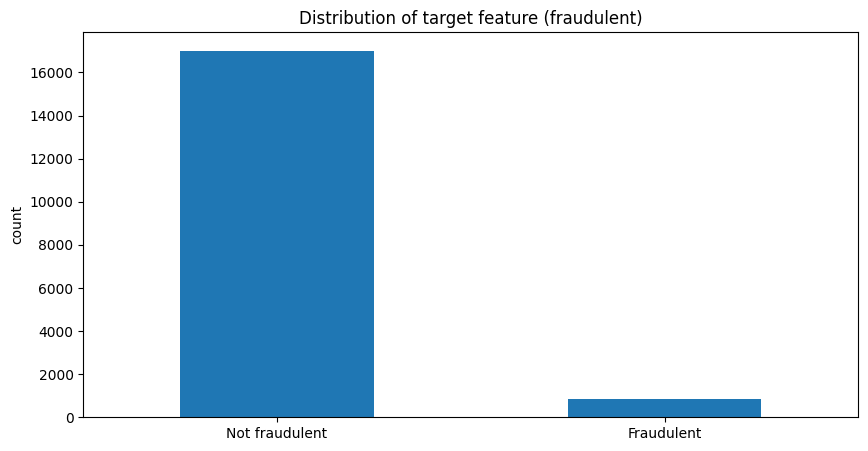

In [40]:
plt.figure(figsize=(10, 5))
# make plot directly from the dataframe
ax = df.fraudulent.value_counts().plot(kind='bar', title='Distribution of target feature (fraudulent)')
# add labels to the plot
ax.set_ylabel('count')
ax.set_xticklabels(['Not fraudulent', 'Fraudulent'], rotation=0)
plt.show()

Conclusion: Classes are NOT equally distributed (balanced). Therefore we can sadly not use accuracy as our metric. <br>
Possible Solution: <br>
- Oversampling/undersampling
- use [not-only-accuracy] metrics (e.g. ROC, AUC)
- Change performance metric (e.g. confusion matrix, precision, recall, f1-score)
- Use another algorithm (e.g. logistic regression --> random forest classifier)
- Generate synthetic samples (e.g. SMOTE) <br>

source of last: https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18

Now we will have a look at the distribution for the binary features:

In [41]:
binary_features

['telecommuting', 'has_company_logo', 'has_questions', 'salary_specified']

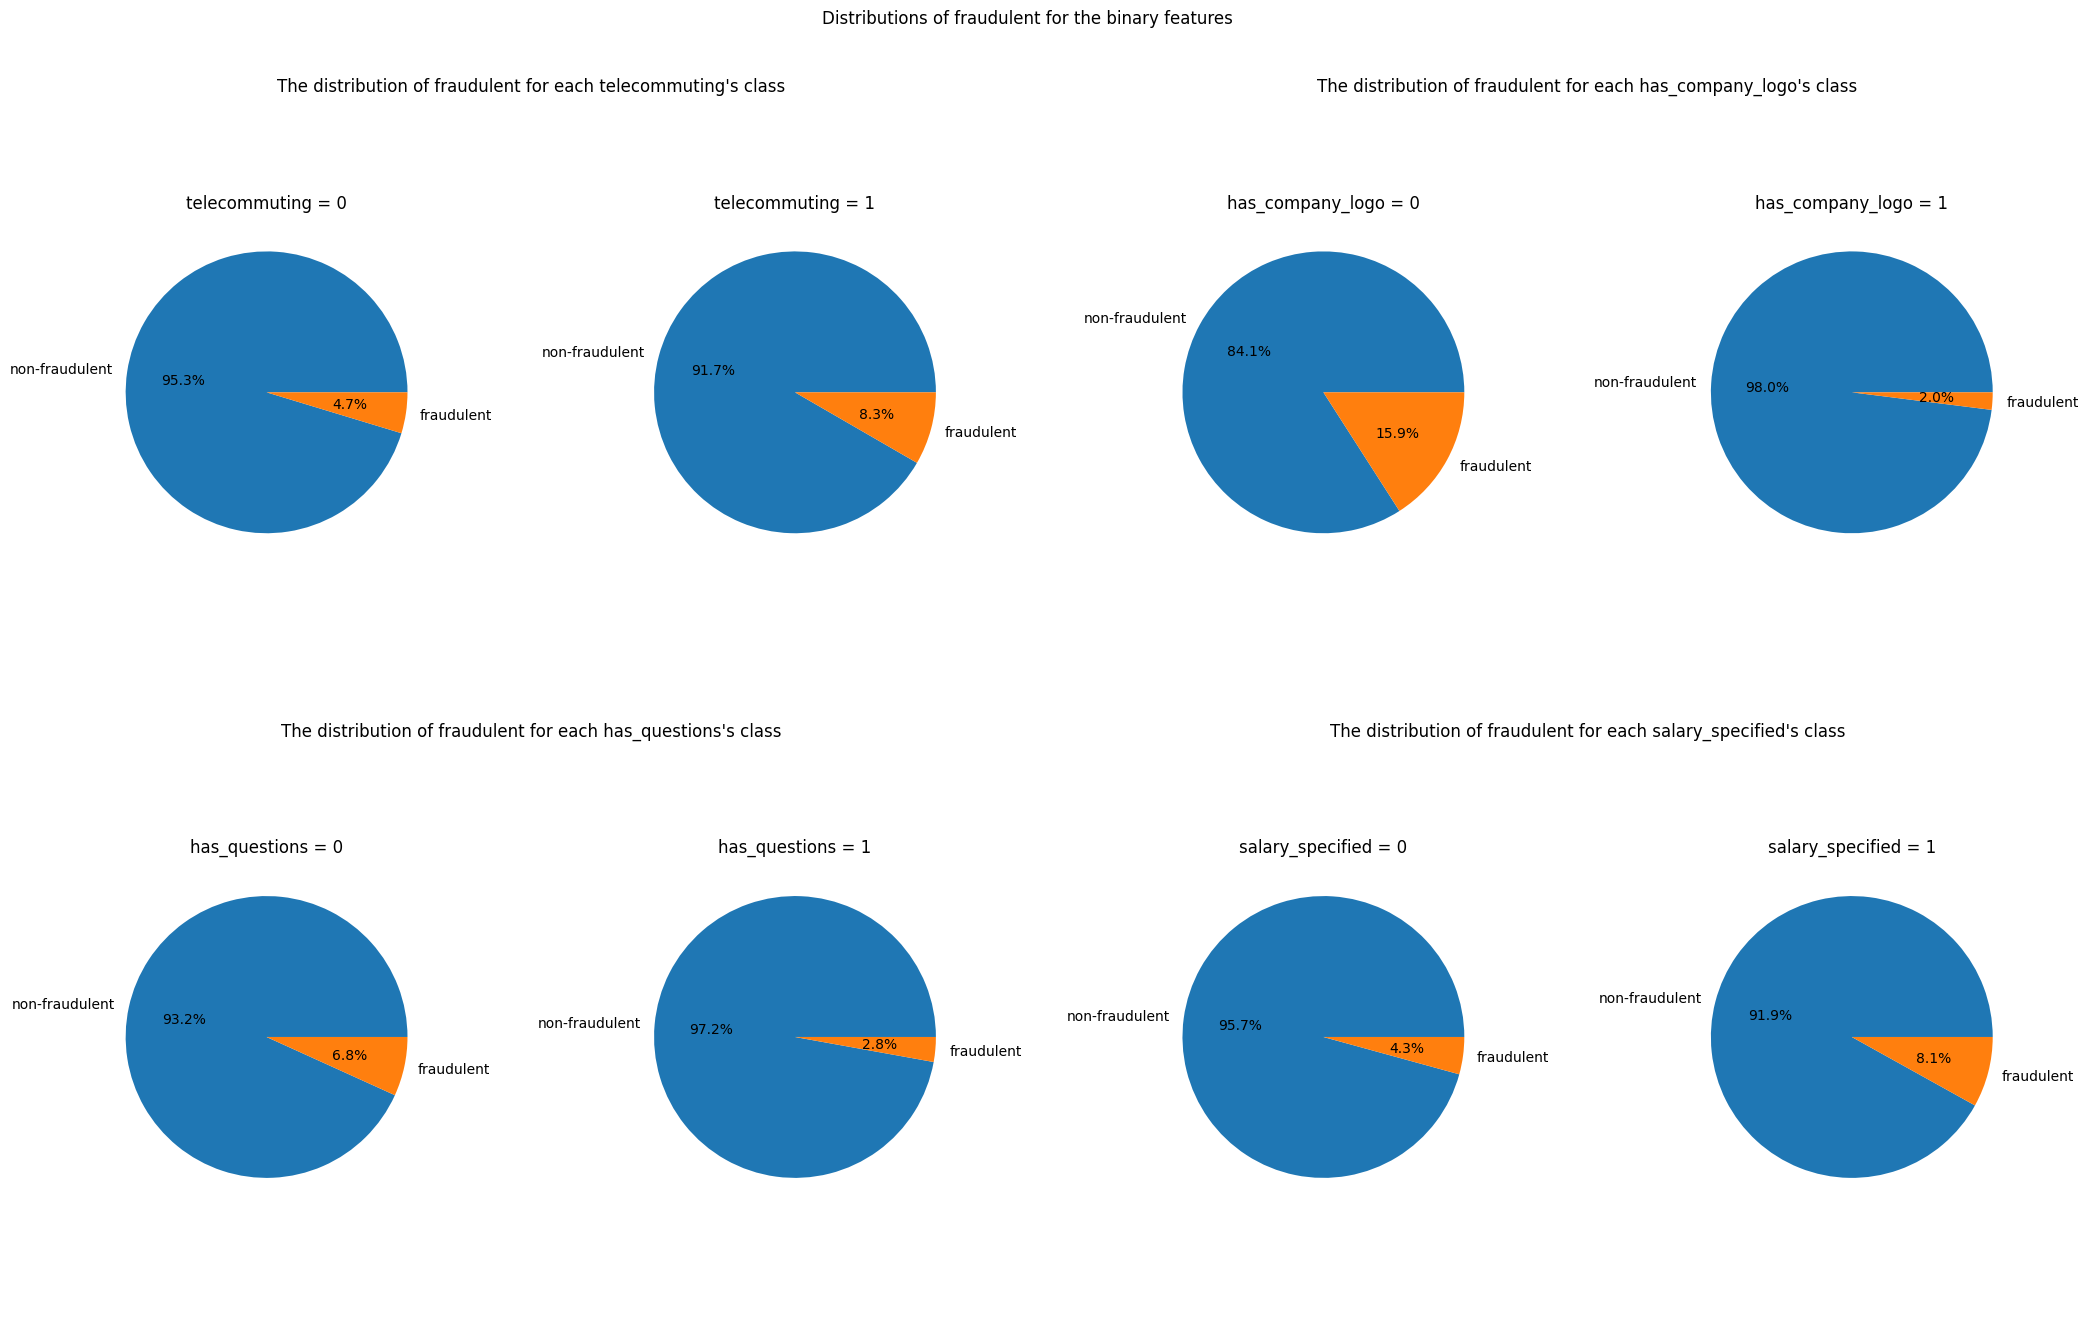

In [42]:
fig = plt.figure(figsize=(25, 30))
outer = gridspec.GridSpec(4, 2, wspace=0.2, hspace=0.1)

for feature_ind, feature_name in enumerate(binary_features):
    inner = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=outer[feature_ind], 
                                             wspace=0.5, hspace=0.7)
    
    ax = plt.Subplot(fig, outer[feature_ind])
    ax.set_title(f'The distribution of fraudulent for each {feature_name}\'s class')
    ax.axis('off')
    fig.add_subplot(ax)
    
    for feature_class in [0, 1]:
        ax = plt.Subplot(fig, inner[feature_class])
        feature_cl_vc = df[df[feature_name] == feature_class].fraudulent.value_counts().sort_index()
        if len(feature_cl_vc) == 2:
            feature_cl_vc.index = ['non-fraudulent', 'fraudulent']
        else: 
            feature_cl_vc.index = ['fraudulent']
        
        ax.pie(feature_cl_vc.values, labels=feature_cl_vc.index, autopct='%1.1f%%')
        ax.set_title(f'{feature_name} = {feature_class}')
        fig.add_subplot(ax)

fig.suptitle('Distributions of fraudulent for the binary features')
fig.subplots_adjust(top=0.95)
plt.show()

Conclusion: many fraudulent job postings do NOT have a company logo.

In [43]:
def plot_cat_feature_distribution(feature_name):
    '''Makes a plotly chart with categorical feature\'s distribution.'''
    feature_0f = df[df.fraudulent == 0][feature_name].value_counts()
    feature_1f = df[df.fraudulent == 1][feature_name].value_counts()
    
    fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], 
                        subplot_titles=['non-fraudulent', 'fraudulent'])
    fig.add_trace(go.Pie(labels=feature_0f.index, 
                         values=feature_0f.values), 
                  row=1, col=1)
    fig.add_trace(go.Pie(labels=feature_1f.index, 
                         values=feature_1f.values), 
                  row=1, col=2)
    
    fig.update_layout(title_text=f'The distribution of {feature_name}')
    fig.show()

In [44]:
plot_cat_feature_distribution('employment_type')

In [45]:
plot_cat_feature_distribution('required_experience')

In [46]:
plot_cat_feature_distribution('required_education')

In [47]:
func_meanfr_pt = pd.pivot_table(df, index='function', values='fraudulent', 
                                aggfunc=np.mean).sort_values(['fraudulent'], ascending=False)
func_meanfr_pt.columns = ['Proportion of fraudulent posts']
print('Top-15 function\'s values with the biggest proportions of fraudulent posts:')
display(func_meanfr_pt.head(15))

Top-15 function's values with the biggest proportions of fraudulent posts:


,Proportion of fraudulent posts
function,
Administrative,0.188889
Financial Analyst,0.151515
Accounting/Auditing,0.136792
Distribution,0.125000
Other,0.098462
Finance,0.087209
Engineering,0.083828
Business Development,0.057018
Advertising,0.055556


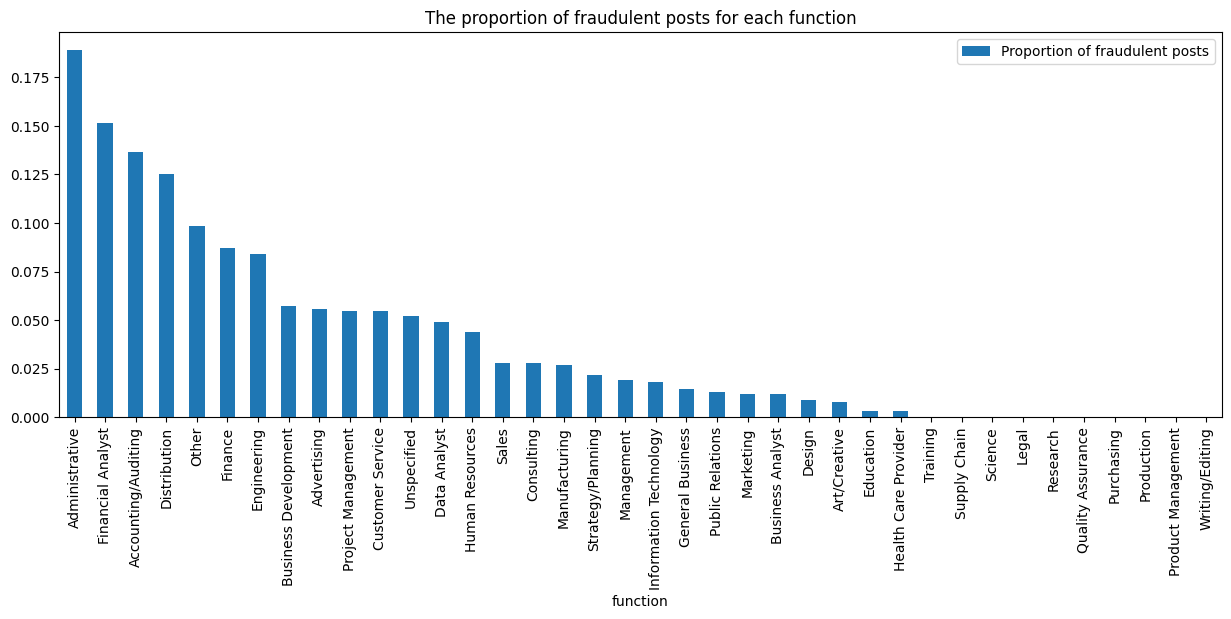

In [48]:
ax = func_meanfr_pt.plot(kind='bar', figsize=(15, 5), title='The proportion of fraudulent posts for each function')

In [49]:
country_meanfr_pt = pd.pivot_table(df, index='country', values='fraudulent', 
                                   aggfunc=np.mean).sort_values(['fraudulent'], ascending=False)
country_meanfr_pt.columns = ['Proportion of fraudulent posts']
print('Top-15 country\'s values with the biggest proportions of fraudulent posts:')
display(country_meanfr_pt.head(15))

Top-15 country's values with the biggest proportions of fraudulent posts:


,Proportion of fraudulent posts
country,
MY,0.571429
BH,0.555556
TW,0.500000
QA,0.285714
AU,0.186916
ID,0.076923
US,0.068506
SA,0.066667
Unspecified,0.054913


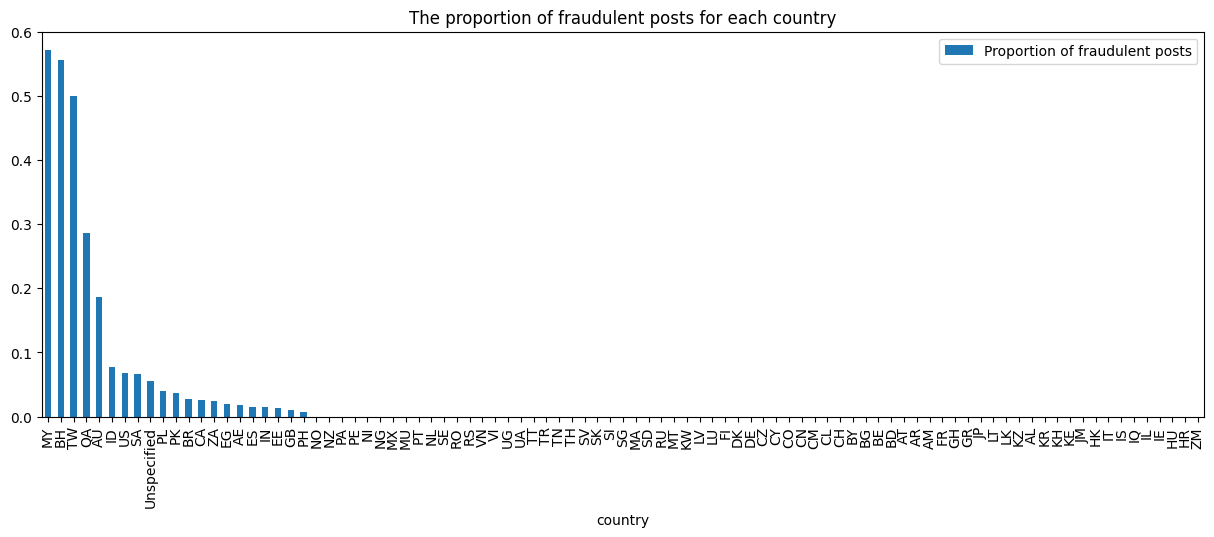

In [50]:
ax = country_meanfr_pt.plot(kind='bar', figsize=(15, 5), title='The proportion of fraudulent posts for each country')

#### Categorial Features

# Oversampling

Veranschaulichung:

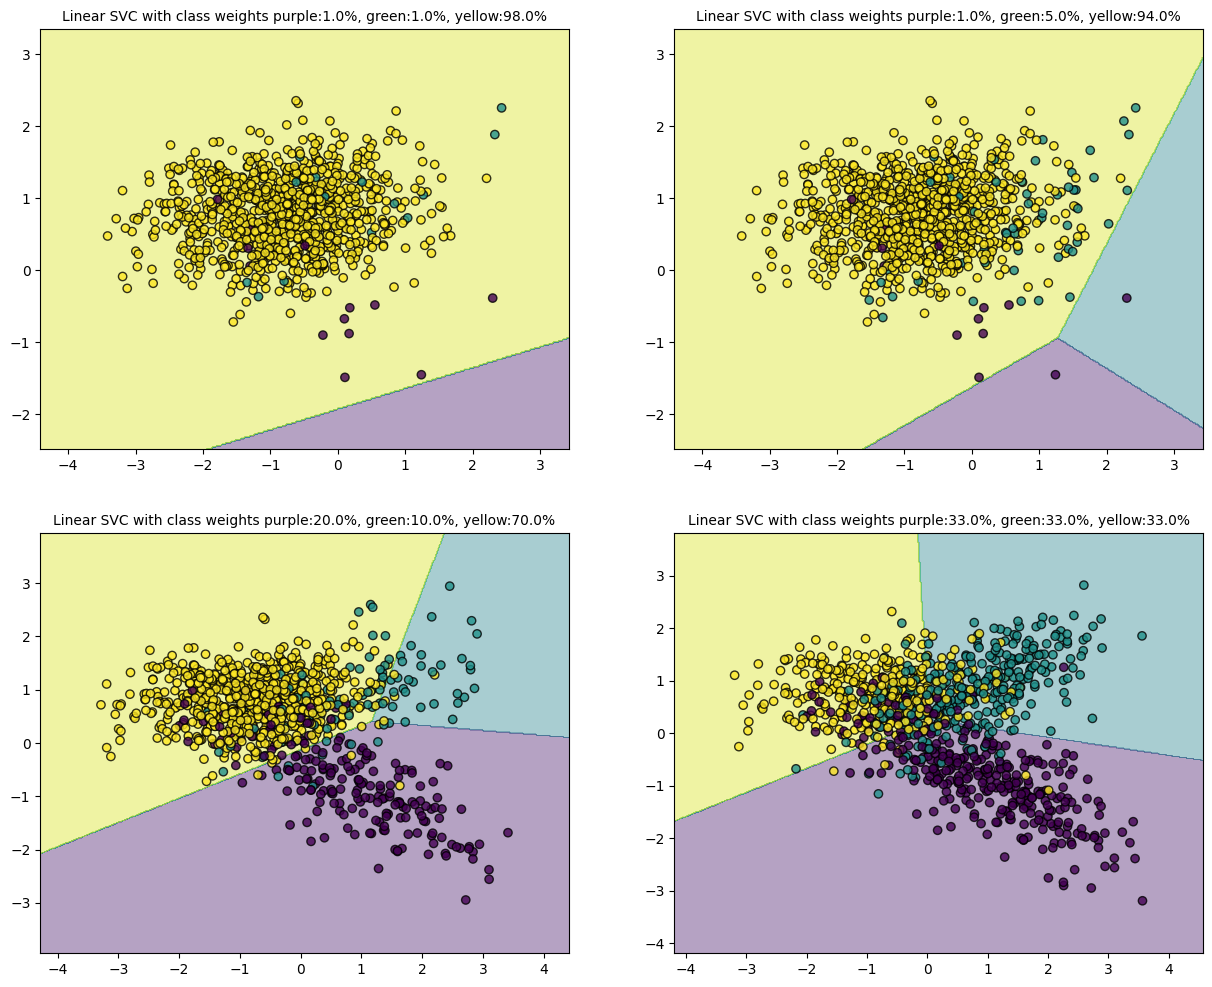

In [51]:
def create_dataset(n_samples=1000, weights=(0.01, 0.01, 0.98), n_classes=3,
                   class_sep=0.8, n_clusters=1):
    return make_classification(n_samples=n_samples, n_features=2,
                               n_informative=2, n_redundant=0, n_repeated=0,
                               n_classes=n_classes,
                               n_clusters_per_class=n_clusters,
                               weights=list(weights),
                               class_sep=class_sep, random_state=0)

def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')
    
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

ax_arr = (ax1, ax2, ax3, ax4)
weights_arr = ((0.01, 0.01, 0.98), (0.01, 0.05, 0.94),
               (0.2, 0.1, 0.7), (0.33, 0.33, 0.33))
for ax, weights in zip(ax_arr, weights_arr):
    X, y = create_dataset(n_samples=1000, weights=weights)
    clf = LinearSVC().fit(X, y)
    plot_decision_function(X, y, clf, ax)
    purple = weights[0]
    green = weights[1]
    yellow = weights[2]
    ax.set_title(f'Linear SVC with class weights purple:{purple*100}%, green:{green*100}%, yellow:{yellow*100}%', size=10)

Solving the problem for our dataset

In [52]:
df_fraudulent = df[df.fraudulent == 1]
df_fraudulent

,department,country,state,city,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,min_salary,max_salary,salary_specified
98,Oil & Energy,US,Unspecified,"Stocton, CA",0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1,95000,115000,1
144,Unspecified,Unspecified,Unspecified,Unspecified,0,0,0,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,1,0,0,0
173,Power Plant & Energy,US,Unspecified,Unspecified,0,1,1,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,1,0,0,0
180,Sales,PK,SD,Karachi,0,0,0,Unspecified,Unspecified,Unspecified,Unspecified,Sales,1,0,0,0
215,Oil & Energy,US,CA,"Bakersfield, CA / Mt. Poso",0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1,95000,115000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17827,Unspecified,US,CA,Los Angeles,0,0,0,Part-time,Unspecified,Unspecified,Unspecified,Unspecified,1,0,0,0
17828,Sales and Marketing,AU,NSW,Sydney,0,0,1,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,1,0,0,0
17829,Unspecified,PL,MZ,Warsaw,0,0,0,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,1,0,0,0
17830,Unspecified,US,NY,New York,0,0,0,Full-time,Unspecified,Unspecified,Apparel & Fashion,Accounting/Auditing,1,0,0,0


In [53]:
df_original = df.copy()
df_oversampled = df.append([df_fraudulent]*5, ignore_index=True)
df_oversampled

C:\Users\alexa\AppData\Local\Temp\ipykernel_12592\2316868562.py:2: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,department,country,state,city,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,min_salary,max_salary,salary_specified
0,Marketing,US,NY,New York,0,1,0,Other,Internship,Unspecified,Unspecified,Marketing,0,0,0,0
1,Success,NZ,Unspecified,Auckland,0,1,0,Full-time,Not Applicable,Unspecified,Marketing and Advertising,Customer Service,0,0,0,0
2,Unspecified,US,IA,Wever,0,1,0,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,0,0,0,0
3,Sales,US,DC,Washington,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,0,0,0
4,Unspecified,US,FL,Fort Worth,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22205,Unspecified,US,CA,Los Angeles,0,0,0,Part-time,Unspecified,Unspecified,Unspecified,Unspecified,1,0,0,0
22206,Sales and Marketing,AU,NSW,Sydney,0,0,1,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,1,0,0,0
22207,Unspecified,PL,MZ,Warsaw,0,0,0,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,1,0,0,0
22208,Unspecified,US,NY,New York,0,0,0,Full-time,Unspecified,Unspecified,Apparel & Fashion,Accounting/Auditing,1,0,0,0


[Text(0, 0, '17014'), Text(0, 0, '5196')]

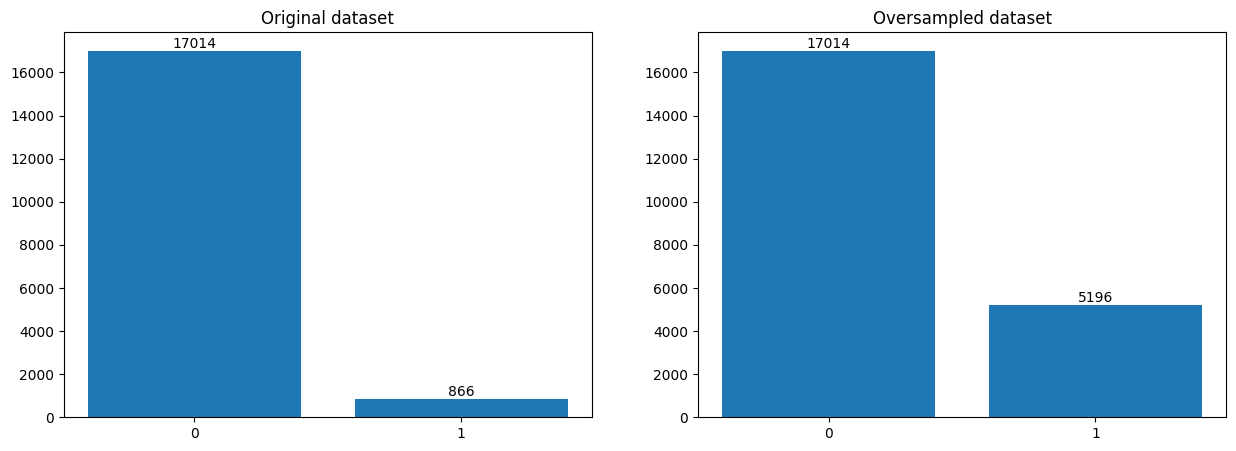

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.bar([0, 1], list(df_original.fraudulent.value_counts()))
ax1.xaxis.set_ticks([0, 1])
ax1.title.set_text('Original dataset')
ax1.bar_label(ax1.containers[0], fmt='%1.0f')

ax2.bar([0, 1], list(df_oversampled.fraudulent.value_counts()))
ax2.xaxis.set_ticks([0, 1])
ax2.title.set_text('Oversampled dataset')
ax2.bar_label(ax2.containers[0], fmt='%1.0f')



#### Alterantive Possible Solution

In [55]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

oversample_ROS = RandomOverSampler(sampling_strategy='minority')
oversample_SMOTE = SMOTE(sampling_strategy='minority')


RandomOverSampler vs. SMOTE <br>
ROS:    Duplicates data <br>
SMOTE:  Tries to find values in between

In [56]:
df_ROS = df.copy()
df_SMOTE = df.copy()

In [57]:
# RandomOverSampler

X_ROS, y_ROS = oversample_ROS.fit_resample(df_ROS, df_ROS['fraudulent'])
X_ROS

,department,country,state,city,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,min_salary,max_salary,salary_specified
0,Marketing,US,NY,New York,0,1,0,Other,Internship,Unspecified,Unspecified,Marketing,0,0,0,0
1,Success,NZ,Unspecified,Auckland,0,1,0,Full-time,Not Applicable,Unspecified,Marketing and Advertising,Customer Service,0,0,0,0
2,Unspecified,US,IA,Wever,0,1,0,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,0,0,0,0
3,Sales,US,DC,Washington,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,0,0,0
4,Unspecified,US,FL,Fort Worth,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34023,Sales,US,CO,Denver,1,1,0,Full-time,Entry level,High School or equivalent,Financial Services,Sales,1,30000,40000,1
34024,Maintenance,US,OH,Cincinnati,0,1,1,Full-time,Unspecified,Unspecified,Unspecified,Unspecified,1,0,0,0
34025,Unspecified,US,MI,Livonia,0,0,0,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,1,0,0,0
34026,Unspecified,AU,NSW,Sydney,0,0,0,Part-time,Unspecified,Unspecified,Unspecified,Unspecified,1,0,0,0


In [61]:
X_SMOTE, y_SMOTE = oversample_SMOTE.fit_resample(df_SMOTE, df_SMOTE['fraudulent'])
X_SMOTE

ValueError: could not convert string to float: 'Marketing'

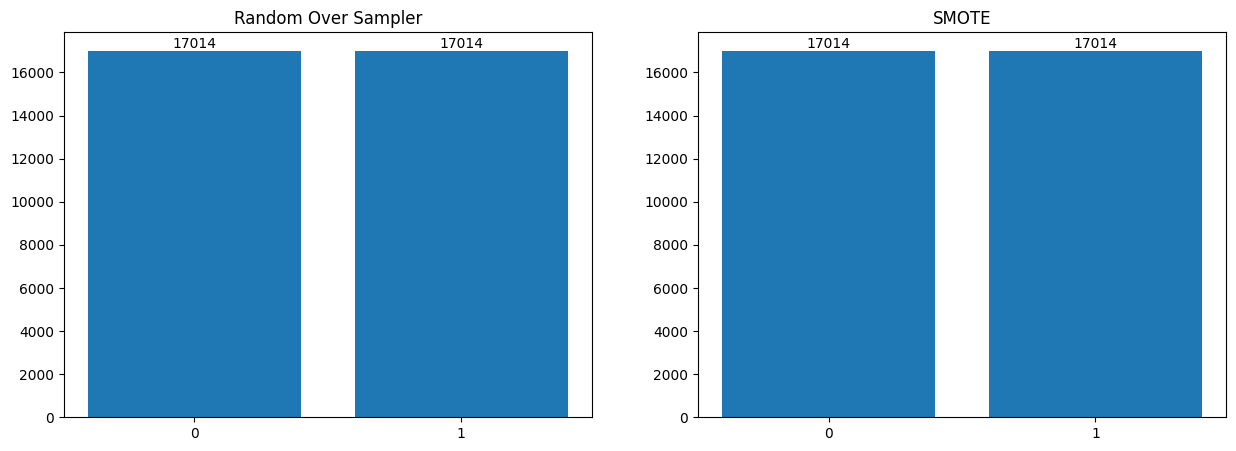

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.bar([0, 1], list(X_ROS.fraudulent.value_counts()))
ax1.xaxis.set_ticks([0, 1])
ax1.title.set_text('Random Over Sampler')
ax1.bar_label(ax1.containers[0], fmt='%1.0f')

ax2.bar([0, 1], list(X_SMOTE.fraudulent.value_counts()))
ax2.xaxis.set_ticks([0, 1])
ax2.title.set_text('SMOTE')
ax2.bar_label(ax2.containers[0], fmt='%1.0f')
plt.show()

# Training/Fit the Model 

In [60]:
log_reg = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000)

X_train, X_test, y_train, y_test = train_test_split(df_SMOTE.drop('fraudulent', axis=1), df_SMOTE['fraudulent'])

# train model
res = log_reg.fit(X_train, y_train)

# evaluate model
print(res.score(X_test, y_test))


ValueError: could not convert string to float: 'Unspecified'